In [266]:
import numpy as np
import matplotlib.pyplot as plt


NameError: name 'ROOT' is not defined

## Define variables and functs

In [242]:
from scipy import optimize

def SineFit(t,v,freq):
    params, params_covariance = optimize.curve_fit(SineFunc,t,v,p0=[freq,np.pi/2.0,350])#,bounds=([-np.inf,-np.inf,200],[np.inf,np.inf,np.inf]))#freq,offset,amplitude,voff
    if(params[2]<0):
        params[2]=np.abs(params[2])
        params[1]=params[1]+np.pi
    params[1]=params[1]%(np.pi*2)
    while(params[1]<0):
        params[1]=params[1]+np.pi*2.0
    return(params)
def SineFunc(t,k,phi,A): #time, freq, offset, amplitude
    return A*np.sin(2*np.pi*k*t-phi)



In [265]:
ch = 0
pol = 0

array([2.17912471e-01, 4.98997002e+00, 4.01763071e+02])

In [252]:
time = np.load('./time_2827_%i0100.npy'%ch)
voltage = np.load('./volts_2827_%i0100.npy'%ch)
blocks = np.load('./blocks_2827_%i0100.npy'%ch)
voltage_final = np.load('./volts_2827_%i0111.npy'%ch)
time_final = np.load('./time_2827_%i0110.npy'%ch)

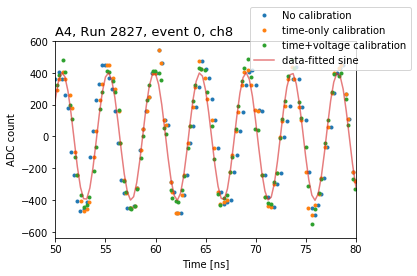

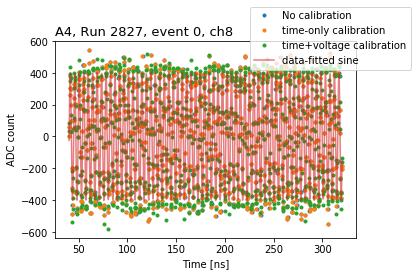

In [253]:
if pol==0:
    params=SineFit(time[1],voltage[1],0.218)
    params
    plt.figure()
    plt.plot(time[1],voltage[1], ".",label="No calibration")
    plt.plot(time_final[1]+time[1][0],voltage[1],"." ,label="time-only calibration")
    plt.plot(time_final[1]+time[1][0],voltage_final[1],".",label="time+voltage calibration")
    plt.plot(time[1], SineFunc(time[1],params[0],params[1],params[2]),label='data-fitted sine', alpha=0.6)
    plt.legend(bbox_to_anchor=(1.2, 1.2), loc='upper right', ncol=1)
    plt.title("A4, Run 2827, event 0, ch8", loc="left", fontsize=13)
    plt.ylabel("ADC count")
    plt.xlabel("Time [ns]")
    plt.xlim(50,80)
    plt.tight_layout()
    plt.figure()
    plt.plot(time[1],voltage[1], ".",label="No calibration")
    plt.plot(time_final[1]+time[1][0],voltage[1],"." ,label="time-only calibration")
    plt.plot(time_final[1]+time[1][0],voltage_final[1],".",label="time+voltage calibration")
    plt.plot(time[1], SineFunc(time[1],params[0],params[1],params[2]),label='data-fitted sine', alpha=0.6)
    plt.legend(bbox_to_anchor=(1.2, 1.2), loc='upper right', ncol=1)
    plt.title("A4, Run 2827, event 0, ch8", loc="left", fontsize=13)
    plt.ylabel("ADC count")
    plt.xlabel("Time [ns]")
#     plt.xlim(50,80)
    plt.tight_layout()
    
if pol==1:
    params=SineFit(time[1][1::2],voltage[1][1::2],0.218)
    params

    plt.figure()
    plt.plot(time[1][1::2], voltage[1][1::2], label='Data')
# plt.scatter(time_final[1], voltage[1], label='Data')

    plt.plot(time[1][1::2],SineFunc(time[1][1::2],params[0],params[1],params[2]),label='Fitted function')
    plt.plot(time_final[1][9::2]+time[1][0],voltage_final[1],"--")
    plt.xlim(50,100)
    plt.legend()
    
    plt.figure()
    plt.plot(time[1][1::2], voltage[1][1::2], label='Data')
# plt.scatter(time_final[1], voltage[1], label='Data')

    plt.plot(time[1][1::2],SineFunc(time[1][1::2],params[0],params[1],params[2]),label='Fitted function')
    plt.plot(time_final[1][9::2]+time[1][0],voltage_final[1],"--")
#     plt.ylim(-600,600)

In [255]:
print(time_final[1][2]-time_final[1][0])

0.6309518214639444


# Final plots

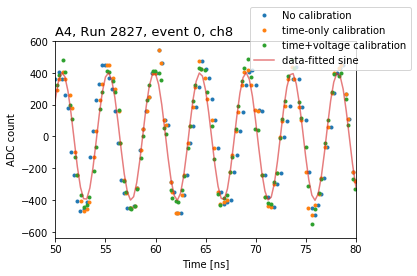

In [215]:
plt.plot(time[1],voltage[1], ".",label="No calibration")
plt.plot(time_final[1]+time[1][0],voltage[1],"." ,label="time-only calibration")
plt.plot(time_final[1]+time[1][0],voltage_final[1],".",label="time+voltage calibration")
plt.plot(time[1], SineFunc(time[1],params[0],params[1],params[2]),label='data-fitted sine', alpha=0.6)
plt.legend(bbox_to_anchor=(1.2, 1.2), loc='upper right', ncol=1)
plt.title("A4, Run 2827, event 0, ch8", loc="left", fontsize=13)
plt.ylabel("ADC count")
plt.xlabel("Time [ns]")
plt.xlim(50,80)
plt.tight_layout()
# plt.savefig("calib_Run2827_ev0_ch8.png", dpi=200)

In [264]:
len(voltage[0,:])

896